## IMPORTING LIBRARIES

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

## LOOK DATASET

In [2]:
pwd

'C:\\Users\\User\\BANGKIT_GOOGLE\\Project 1'

In [16]:
#ONLINE ACCESS AND RESAVE
#df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTkbsvshuhRMeir109MvC_3QvbpJwBJkMN9R0KeCWehSzu74CoU29Nlf11klUkdHWfSoH81HHkbxtru/pub?output=csv')
#df.head()
#df.to_csv('C:\\Users\\User\\BANGKIT_GOOGLE\\Project 1\\DATA_SUV.csv',index=False)

In [3]:
train_df = pd.read_csv('train_final.csv')
test_df = pd.read_csv('test_final.csv')

In [4]:
train_df.head()

,abtest_control,abtest_test,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
0,0,1,32499,2014,170,30000,7
1,0,1,38788,2012,258,60000,10
2,0,1,25800,2012,258,150000,2
3,0,1,99000,2011,211,30000,6
4,1,0,31000,2011,204,125000,1


In [5]:
test_df.head()

,abtest_control,abtest_test,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
0,1,0,24999,2012,170,40000,5
1,0,1,19000,2012,204,40000,10
2,0,1,27800,2012,170,100000,9
3,0,1,23900,2013,143,150000,9
4,0,1,60000,2013,170,40000,1


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   abtest_control       212 non-null    int64
 1   abtest_test          212 non-null    int64
 2   price                212 non-null    int64
 3   yearOfRegistration   212 non-null    int64
 4   powerPS              212 non-null    int64
 5   kilometer            212 non-null    int64
 6   monthOfRegistration  212 non-null    int64
dtypes: int64(7)
memory usage: 11.7 KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   abtest_control       46 non-null     int64
 1   abtest_test          46 non-null     int64
 2   price                46 non-null     int64
 3   yearOfRegistration   46 non-null     int64
 4   powerPS              46 non-null     int64
 5   kilometer            46 non-null     int64
 6   monthOfRegistration  46 non-null     int64
dtypes: int64(7)
memory usage: 2.6 KB


In [9]:
#Describe amount of dataset based on years
print('Training set')
print(train_df['yearOfRegistration'].value_counts())
print('Total data train is {}\n'.format(train_df.shape[0]))
print('Testing set')
print(test_df['yearOfRegistration'].value_counts())
print('Total data test is {}'.format(test_df.shape[0]))

Training set
2011    65
2012    53
2013    37
2014    28
2015    20
2016     9
Name: yearOfRegistration, dtype: int64
Total data train is 212

Testing set
2013    13
2012    12
2011    12
2014     7
2015     2
Name: yearOfRegistration, dtype: int64
Total data test is 46


In [13]:
#Describe statistics of dataset
print('Train data description')
print(train_df.describe())
print('\n')
print('Test data description')
print(test_df.describe())

Train data description
       abtest_control  abtest_test    price  yearOfRegistration  powerPS  \
count           212.0        212.0    212.0               212.0    212.0   
mean              0.4          0.6  36316.1              2012.6    209.9   
std               0.5          0.5  17327.9                 1.5     73.8   
min               0.0          0.0    690.0              2011.0      0.0   
25%               0.0          0.0  25375.0              2011.0    170.0   
50%               0.0          1.0  31775.0              2012.0    204.0   
75%               1.0          1.0  41900.0              2014.0    258.0   
max               1.0          1.0 127500.0              2016.0    585.0   

       kilometer  monthOfRegistration  
count      212.0                212.0  
mean     69599.1                  6.0  
std      46658.0                  3.2  
min       5000.0                  0.0  
25%      30000.0                  3.0  
50%      60000.0                  6.0  
75%     1000

## CREATE AND TRAIN ML MODEL

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow.keras.optimizers as op
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_absolute_error,mean_squared_error

In [60]:
X_train = train_df.drop('price',axis=1)     #Spliting training label and features
y_train = train_df['price']

In [61]:
X_test = test_df.drop('price',axis=1) #Spliting testing label and features
y_test = test_df['price']

In [62]:
X_train.head()

,abtest_control,abtest_test,yearOfRegistration,powerPS,kilometer,monthOfRegistration
0,0,1,2014,170,30000,7
1,0,1,2012,258,60000,10
2,0,1,2012,258,150000,2
3,0,1,2011,211,30000,6
4,1,0,2011,204,125000,1


In [18]:
y_train.head()

0    32499
1    38788
2    25800
3    99000
4    31000
Name: price, dtype: int64

In [63]:
model = Sequential()
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam',loss='mse')

In [64]:
early_stop = EarlyStopping(monitor='val_loss',verbose=1,patience=2)

In [65]:
model.fit(X_train.values,y_train.values,epochs=300,
          validation_data = (X_test.values,y_test.values),
          callbacks = [early_stop])

Train on 212 samples, validate on 46 samples
Epoch 1/300
212/212 [==============================] - 1s 3ms/sample - loss: 1091466246.0377 - val_loss: 742204788.8696
Epoch 2/300
212/212 [==============================] - 0s 207us/sample - loss: 1060126082.4151 - val_loss: 738156624.6957
Epoch 3/300
212/212 [==============================] - 0s 212us/sample - loss: 1034028355.6226 - val_loss: 737958127.3043
Epoch 4/300
212/212 [==============================] - 0s 216us/sample - loss: 1013033522.7170 - val_loss: 740869081.0435
Epoch 5/300
212/212 [==============================] - 0s 250us/sample - loss: 997547577.9623 - val_loss: 745948950.2609
Epoch 00005: early stopping


In [66]:
loss = pd.DataFrame(model.history.history)

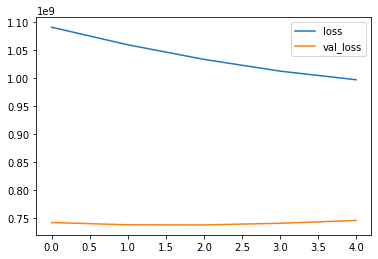

In [67]:
loss.plot()

# LOSS is too big.It's possible due to less data to perform good training 
# Too many features may make model get confuse to learn the pattern.

In [68]:
model.evaluate(X_train.values,y_train.values);

212/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [73]:
pred = model.predict(X_test.values)

In [74]:
import numpy as np
Mean_Absolute_Error = np.mean(abs(y_test.values-abs(pred)))  
Mean_Absolute_Error

20059.701647233873

In [75]:
error=RootMeanSquaredError()
error.update_state(y_test.values,pred)
print('RMSE model is : {}'.format(error.result().numpy()))
print('First true price and prediction : {} , {}'.format(y_test.values[0],
                                                        int(pred[0])))

RMSE model is : 27312.06640625
First true price and prediction : 24999 , 13755


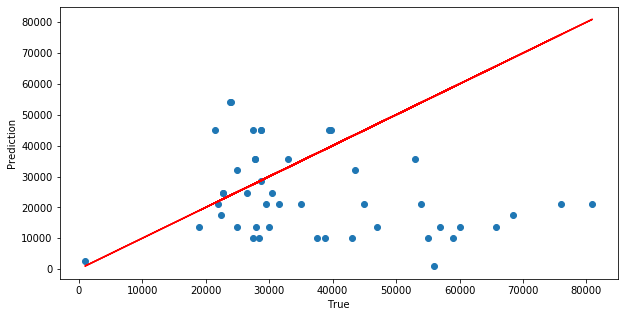

In [76]:
plt.figure(figsize=(10,5))
plt.scatter(x=y_test.values,y=pred)
plt.xlabel('True')
plt.ylabel('Prediction')
plt.plot(y_test.values,y_test.values,'r')
#BLUE DOT SHOWS PREDICTION PATTERN AND RED LINE SHOW TRUE/PERFECT VALUE PATTERN

In [77]:
X_train.head()

,abtest_control,abtest_test,yearOfRegistration,powerPS,kilometer,monthOfRegistration
0,0,1,2014,170,30000,7
1,0,1,2012,258,60000,10
2,0,1,2012,258,150000,2
3,0,1,2011,211,30000,6
4,1,0,2011,204,125000,1


In [78]:
#Remove features year and month 
X_train = X_train.drop(['yearOfRegistration','monthOfRegistration'],axis=1)
X_test  = X_test.drop(['yearOfRegistration','monthOfRegistration'],axis=1)

In [79]:
X_train.head()

,abtest_control,abtest_test,powerPS,kilometer
0,0,1,170,30000
1,0,1,258,60000
2,0,1,258,150000
3,0,1,211,30000
4,1,0,204,125000


In [80]:
X_train['powerPS'] = X_train['powerPS']/X_train['powerPS'].max()
X_test['powerPS'] = X_test['powerPS']/X_test['powerPS'].max()
X_train['kilometer'] = X_train['kilometer']/X_train['kilometer'].max()
X_test['kilometer'] = X_test['kilometer']/X_test['kilometer'].max()
X_train.head()

,abtest_control,abtest_test,powerPS,kilometer
0,0,1,0.3,0.2
1,0,1,0.4,0.4
2,0,1,0.4,1.0
3,0,1,0.4,0.2
4,1,0,0.3,0.8


In [81]:
model = Sequential()
model.add(Dense(3,activation='relu'))

model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam',loss='mse')
early_stop = EarlyStopping(monitor='val_loss',
                           mode='min',verbose=1,patience=2)

In [82]:
model.fit(X_train.values,y_train.values,epochs=300,validation_data=(X_test.values,y_test.values),
          callbacks = [early_stop])

Train on 212 samples, validate on 46 samples
Epoch 1/300
212/212 [==============================] - 1s 3ms/sample - loss: 1617684001.8113 - val_loss: 1666005626.4348
Epoch 2/300
212/212 [==============================] - 0s 219us/sample - loss: 1617682668.6792 - val_loss: 1666004268.5217
Epoch 3/300
212/212 [==============================] - 0s 245us/sample - loss: 1617681223.2453 - val_loss: 1666002832.6957
Epoch 4/300
212/212 [==============================] - 0s 231us/sample - loss: 1617679814.0377 - val_loss: 1666001218.7826
Epoch 5/300
212/212 [==============================] - 0s 235us/sample - loss: 1617678333.5849 - val_loss: 1665999682.7826
Epoch 6/300
212/212 [==============================] - 0s 259us/sample - loss: 1617676756.5283 - val_loss: 1665998080.0000
Epoch 7/300
212/212 [==============================] - 0s 226us/sample - loss: 1617675090.1132 - val_loss: 1665996299.1304
Epoch 8/300
212/212 [==============================] - 0s 214us/sample - loss: 1617673273.9623 -

212/212 [==============================] - 0s 183us/sample - loss: 1617417467.1698 - val_loss: 1665721778.0870
Epoch 67/300
212/212 [==============================] - 0s 212us/sample - loss: 1617410332.9811 - val_loss: 1665714098.0870
Epoch 68/300
212/212 [==============================] - 0s 193us/sample - loss: 1617403075.6226 - val_loss: 1665706329.0435
Epoch 69/300
212/212 [==============================] - 0s 202us/sample - loss: 1617395533.2830 - val_loss: 1665698482.0870
Epoch 70/300
212/212 [==============================] - 0s 216us/sample - loss: 1617388230.0377 - val_loss: 1665690457.0435
Epoch 71/300
212/212 [==============================] - 0s 207us/sample - loss: 1617380608.0000 - val_loss: 1665682265.0435
Epoch 72/300
212/212 [==============================] - 0s 183us/sample - loss: 1617372850.7170 - val_loss: 1665674162.0870
Epoch 73/300
212/212 [==============================] - 0s 207us/sample - loss: 1617365293.8868 - val_loss: 1665665803.1304
Epoch 74/300
212/212 

212/212 [==============================] - 0s 189us/sample - loss: 1616760868.2264 - val_loss: 1665019336.3478
Epoch 132/300
212/212 [==============================] - 0s 207us/sample - loss: 1616748053.7358 - val_loss: 1665005156.1739
Epoch 133/300
212/212 [==============================] - 0s 184us/sample - loss: 1616734862.4906 - val_loss: 1664991142.9565
Epoch 134/300
212/212 [==============================] - 0s 202us/sample - loss: 1616721705.0566 - val_loss: 1664977051.8261
Epoch 135/300
212/212 [==============================] - 0s 189us/sample - loss: 1616708489.6604 - val_loss: 1664963038.6087
Epoch 136/300
212/212 [==============================] - 0s 199us/sample - loss: 1616695194.5660 - val_loss: 1664948936.3478
Epoch 137/300
212/212 [==============================] - 0s 188us/sample - loss: 1616681829.4340 - val_loss: 1664934589.2174
Epoch 138/300
212/212 [==============================] - 0s 197us/sample - loss: 1616668551.2453 - val_loss: 1664919986.0870
Epoch 139/300


212/212 [==============================] - 0s 194us/sample - loss: 1615752467.3208 - val_loss: 1663939272.3478
Epoch 197/300
212/212 [==============================] - 0s 191us/sample - loss: 1615734610.1132 - val_loss: 1663919860.8696
Epoch 198/300
212/212 [==============================] - 0s 177us/sample - loss: 1615716588.6792 - val_loss: 1663900360.3478
Epoch 199/300
212/212 [==============================] - 0s 202us/sample - loss: 1615698072.1509 - val_loss: 1663881115.8261
Epoch 200/300
212/212 [==============================] - 0s 179us/sample - loss: 1615680002.4151 - val_loss: 1663861615.3043
Epoch 201/300
212/212 [==============================] - 0s 193us/sample - loss: 1615661877.1321 - val_loss: 1663841947.8261
Epoch 202/300
212/212 [==============================] - 0s 187us/sample - loss: 1615643404.0755 - val_loss: 1663822291.4783
Epoch 203/300
212/212 [==============================] - 0s 198us/sample - loss: 1615625044.5283 - val_loss: 1663802379.1304
Epoch 204/300


212/212 [==============================] - 0s 193us/sample - loss: 1614437023.3962 - val_loss: 1662529591.6522
Epoch 262/300
212/212 [==============================] - 0s 197us/sample - loss: 1614414420.5283 - val_loss: 1662505527.6522
Epoch 263/300
212/212 [==============================] - 0s 179us/sample - loss: 1614391817.6604 - val_loss: 1662481563.8261
Epoch 264/300
212/212 [==============================] - 0s 207us/sample - loss: 1614369313.8113 - val_loss: 1662457421.9130
Epoch 265/300
212/212 [==============================] - 0s 179us/sample - loss: 1614347008.0000 - val_loss: 1662432879.3043
Epoch 266/300
212/212 [==============================] - 0s 217us/sample - loss: 1614323818.2642 - val_loss: 1662408815.3043
Epoch 267/300
212/212 [==============================] - 0s 198us/sample - loss: 1614301140.5283 - val_loss: 1662384417.3913
Epoch 268/300
212/212 [==============================] - 0s 197us/sample - loss: 1614278614.9434 - val_loss: 1662359696.6957
Epoch 269/300


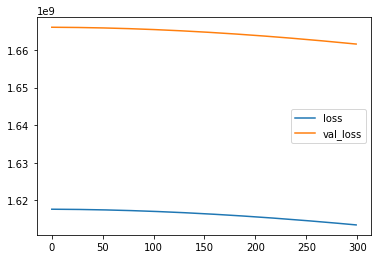

In [83]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [84]:
pred = model.predict(X_test.values)

In [85]:
Mean_Absolute_Error = np.mean(abs(y_test.values-abs(pred)))  
Mean_Absolute_Error

37275.966123498

In [86]:
error=RootMeanSquaredError()
error.update_state(y_test.values,pred)
print('RMSE model is : {}'.format(error.result().numpy()))
print('First true price and prediction : {} , {}'.format(y_test.values[0],
                                                        int(pred[0])))

RMSE model is : 40762.015625
First true price and prediction : 24999 , 54


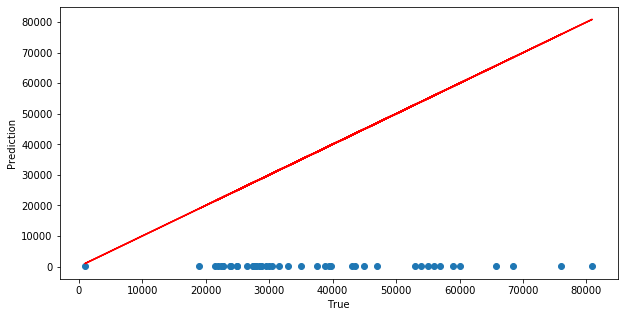

In [87]:
plt.figure(figsize=(10,5))
plt.scatter(x=y_test.values,y=pred)
plt.xlabel('True')
plt.ylabel('Prediction')
plt.plot(y_test.values,y_test.values,'r')
#BLUE DOT SHOWS PREDICTION PATTERN AND RED LINE SHOW TRUE/PERFECT VALUE PATTERN

# MODEL BECOME WORST WITH REDUCTION OF  NUMERICAL FEATURES WITH SCALE VALUE. IT MAY DUE TO INSUFFICIENT DATA, HYPERPARAMETER, OR MODEL NETWORK FOR LEARNING.